# **Borrower Classification with TensorFlow by Kaisen**

## Project Overview
Given historical data on loans given out with information on whether or not the borrower defaulted (charge-off), build a model that can predict wether or nor a borrower will pay back their loan? This way in the future when we get a new potential customer we can assess whether or not they are likely to pay back the loan.

## Libraris Import

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## About The Dataset
The dataset is from Kaggle: https://www.kaggle.com/wordsforthewise/lending-club

In [10]:
# Features Description
data_info = pd.read_csv('/content/drive/MyDrive/TensorFlow_Dataset/lending_club_info.csv', index_col=0)
data_info

,Description
LoanStatNew,
loan_amnt,The listed amount of the loan applied for by t...
term,The number of payments on the loan. Values are...
int_rate,Interest Rate on the loan
installment,The monthly payment owed by the borrower if th...
grade,LC assigned loan grade
sub_grade,LC assigned loan subgrade
emp_title,The job title supplied by the Borrower when ap...
emp_length,Employment length in years. Possible values ar...
home_ownership,The home ownership status provided by the borr...


## Data Preparation

In [11]:
# Read the dataset.
df = pd.read_csv('/content/drive/MyDrive/TensorFlow_Dataset/lending_club_loan_two.csv')

In [12]:
# Check the dataframe.
df.head().transpose()

,0,1,2,3,4
loan_amnt,10000.0,8000.0,15600.0,7200.0,24375.0
term,36 months,36 months,36 months,36 months,60 months
int_rate,11.44,11.99,10.49,6.49,17.27
installment,329.48,265.68,506.97,220.65,609.33
grade,B,B,B,A,C
sub_grade,B4,B5,B3,A2,C5
emp_title,Marketing,Credit analyst,Statistician,Client Advocate,Destiny Management Inc.
emp_length,10+ years,4 years,< 1 year,6 years,9 years
home_ownership,RENT,MORTGAGE,RENT,RENT,MORTGAGE
annual_inc,117000.0,65000.0,43057.0,54000.0,55000.0


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

In [14]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
loan_amnt,396030.0,14113.888089,8357.441341,500.00,8000.00,12000.00,20000.00,40000.00
int_rate,396030.0,13.639400,4.472157,5.32,10.49,13.33,16.49,30.99
installment,396030.0,431.849698,250.727790,16.08,250.33,375.43,567.30,1533.81
annual_inc,396030.0,74203.175798,61637.621158,0.00,45000.00,64000.00,90000.00,8706582.00
dti,396030.0,17.379514,18.019092,0.00,11.28,16.91,22.98,9999.00
open_acc,396030.0,11.311153,5.137649,0.00,8.00,10.00,14.00,90.00
pub_rec,396030.0,0.178191,0.530671,0.00,0.00,0.00,0.00,86.00
revol_bal,396030.0,15844.539853,20591.836109,0.00,6025.00,11181.00,19620.00,1743266.00
revol_util,395754.0,53.791749,24.452193,0.00,35.80,54.80,72.90,892.30
total_acc,396030.0,25.414744,11.886991,2.00,17.00,24.00,32.00,151.00


## EDA

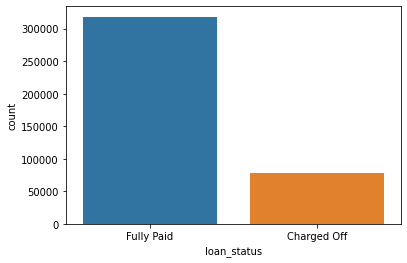

In [15]:
# Draw a count plot to browse the loan_status.
sns.countplot(x='loan_status', data=df)

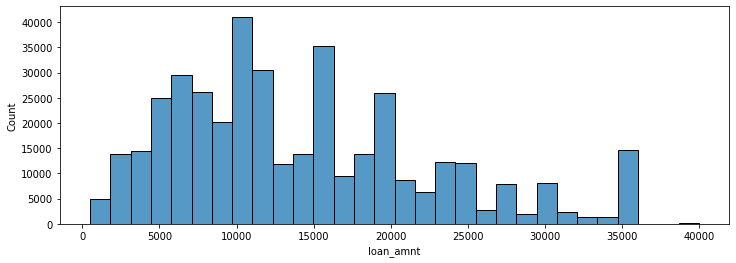

In [16]:
# Browse the loan amount distribution.
plt.figure(figsize=(12,4))
sns.histplot(df['loan_amnt'], bins=30)

In [17]:
# Explore the correlation between different numerical features.
df.corr()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
loan_amnt,1.000000,0.168921,0.953929,0.336887,0.016636,0.198556,-0.077779,0.328320,0.099911,0.223886,0.222315,-0.106539
int_rate,0.168921,1.000000,0.162758,-0.056771,0.079038,0.011649,0.060986,-0.011280,0.293659,-0.036404,-0.082583,0.057450
installment,0.953929,0.162758,1.000000,0.330381,0.015786,0.188973,-0.067892,0.316455,0.123915,0.202430,0.193694,-0.098628
annual_inc,0.336887,-0.056771,0.330381,1.000000,-0.081685,0.136150,-0.013720,0.299773,0.027871,0.193023,0.236320,-0.050162
dti,0.016636,0.079038,0.015786,-0.081685,1.000000,0.136181,-0.017639,0.063571,0.088375,0.102128,-0.025439,-0.014558
open_acc,0.198556,0.011649,0.188973,0.136150,0.136181,1.000000,-0.018392,0.221192,-0.131420,0.680728,0.109205,-0.027732
pub_rec,-0.077779,0.060986,-0.067892,-0.013720,-0.017639,-0.018392,1.000000,-0.101664,-0.075910,0.019723,0.011552,0.699408
revol_bal,0.328320,-0.011280,0.316455,0.299773,0.063571,0.221192,-0.101664,1.000000,0.226346,0.191616,0.194925,-0.124532
revol_util,0.099911,0.293659,0.123915,0.027871,0.088375,-0.131420,-0.075910,0.226346,1.000000,-0.104273,0.007514,-0.086751
total_acc,0.223886,-0.036404,0.202430,0.193023,0.102128,0.680728,0.019723,0.191616,-0.104273,1.000000,0.381072,0.042035


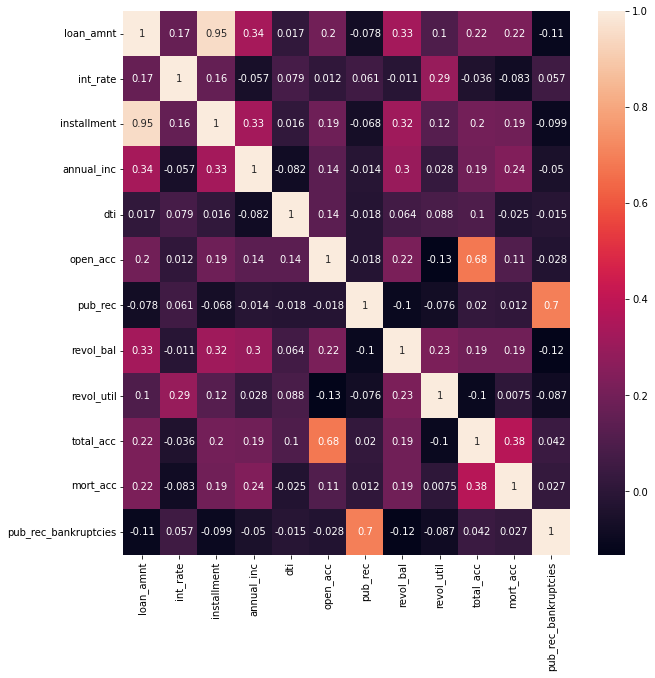

In [18]:
# Visualize the correlation.
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True)

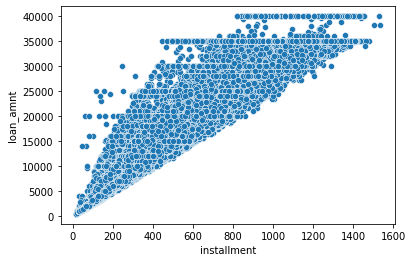

In [19]:
# The installemnt and loan_amnt have a perfect correlation
# Draw a scatter plot between them to see the detail.
sns.scatterplot(x='installment', y='loan_amnt', data=df)

According to the defination and the correlation of the features, the two features are actuallu duplicated.

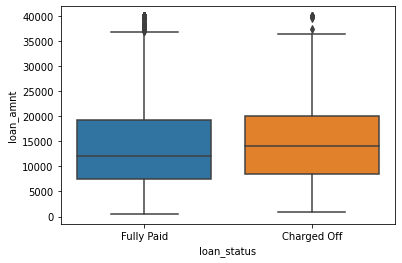

In [20]:
# Create a boxplot showing the relationship between the loan_status and the Loan Amount.
sns.boxplot(x='loan_status', y='loan_amnt', data=df)

In [21]:
# Calculate the summary statistics for the loan amount, grouped by the loan_status.
df.groupby('loan_status').describe()['loan_amnt']

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


In [22]:
# Show the unique possible grades and subgrades?
df['grade'].unique()

array(['B', 'A', 'C', 'E', 'D', 'F', 'G'], dtype=object)

In [23]:
df['sub_grade'].unique()

array(['B4', 'B5', 'B3', 'A2', 'C5', 'C3', 'A1', 'B2', 'C1', 'A5', 'E4',
       'A4', 'A3', 'D1', 'C2', 'B1', 'D3', 'D5', 'D2', 'E1', 'E2', 'E5',
       'F4', 'E3', 'D4', 'G1', 'F5', 'G2', 'C4', 'F1', 'F3', 'G5', 'G4',
       'F2', 'G3'], dtype=object)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


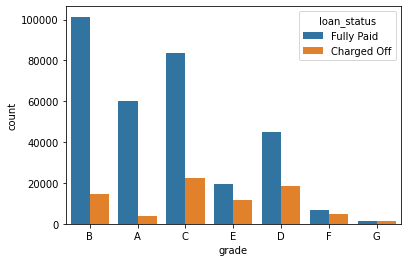

In [24]:
# Create a countplot per grade. Set the hue to the loan_status label.
sns.countplot(df['grade'], hue=df['loan_status'])

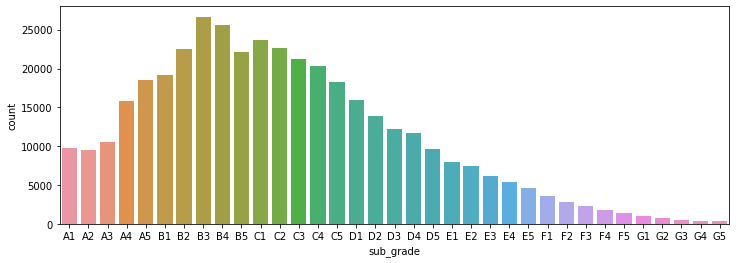

In [25]:
# Display a count plot per subgrade.
plt.figure(figsize=(12,4))
subgrade_order = sorted(df['sub_grade'].unique())
sns.countplot(data=df, x='sub_grade', order=subgrade_order)

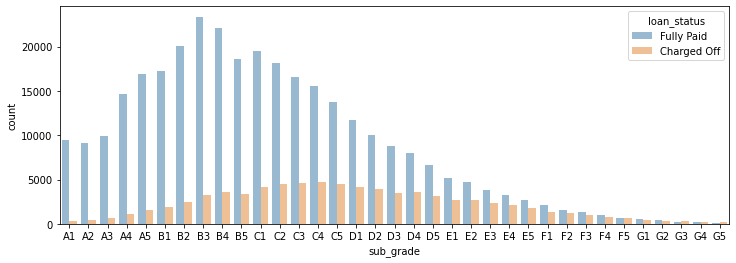

In [27]:
# create a same countplot, but set hue="loan_status"
plt.figure(figsize=(12,4))
sns.countplot(data=df, x='sub_grade', order=subgrade_order, hue='loan_status', alpha=0.5)

It looks like F and G subgrades don't get paid back that often. Perpare to isloate those and recreate the countplot just for those subgrades.

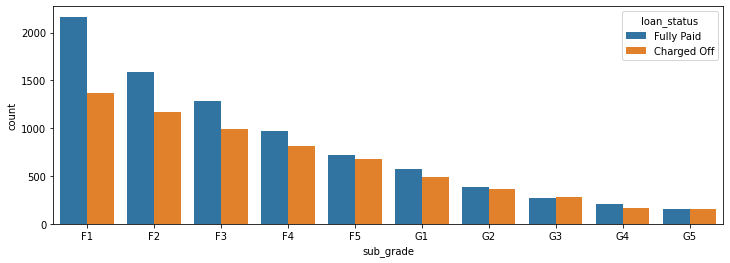

In [28]:
df_fg = df[(df['grade'] == 'F') | (df['grade'] == 'G')]
sub_order = sorted(df_fg['sub_grade'].unique())
plt.figure(figsize=(12,4))
sns.countplot(data=df_fg, x='sub_grade', hue='loan_status', order=sub_order)

In [30]:
# Create a new column called 'loan_repaid' which will contain 
# a 1 if the loan status was "Fully Paid" and a 0 if it was "Charged Off".
def defineRepaid(status):
  if status == 'Fully Paid':
    return 1
  else:
    return 0
df['loan_repaid'] = df['loan_status'].apply(defineRepaid)
df[['loan_repaid', 'loan_status']]

,loan_repaid,loan_status
0,1,Fully Paid
1,1,Fully Paid
2,1,Fully Paid
3,1,Fully Paid
4,0,Charged Off
...,...,...
396025,1,Fully Paid
396026,1,Fully Paid
396027,1,Fully Paid
396028,1,Fully Paid


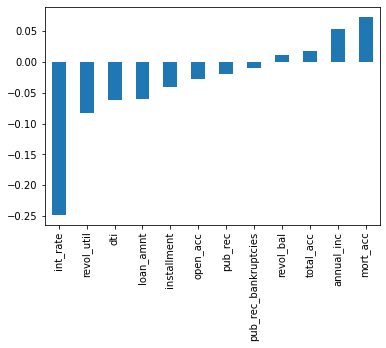

In [31]:
# Create a bar plot showing the correlation of the numeric features to the new loan_repaid column. 
df.corr()['loan_repaid'].sort_values()[:-1].plot(kind='bar')

## Feature Engineering

In [32]:
# Check the length of the dataframe.
len(df)

396030

In [33]:
# Check if there is null value in the dataframe.
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

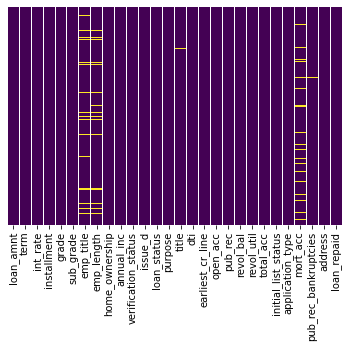

In [34]:
# Visualize the null value distribution.
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [35]:
# Get the percentage of the null value in each column.
df.isnull().sum()/len(df)

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               0.057892
emp_length              0.046211
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.004431
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.000697
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                0.095435
pub_rec_bankruptcies    0.001351
address                 0.000000
loan_repaid             0.000000
dtype: float64

In [36]:
# Show the number of unique employment title.
df['emp_title'].nunique()

173105

In [37]:
# Show the number of each unique employment title.
df['emp_title'].value_counts()

Teacher                    4389
Manager                    4250
Registered Nurse           1856
RN                         1846
Supervisor                 1830
                           ... 
Postman                       1
McCarthy & Holthus, LLC       1
jp flooring                   1
Histology Technologist        1
Gracon Services, Inc          1
Name: emp_title, Length: 173105, dtype: int64

According to the result above. There are too many unique job titles. It may not really helpful if convert this to a dummy variable feature. So remove that emp_title column.

In [38]:
df.drop('emp_title', axis=1, inplace=True)

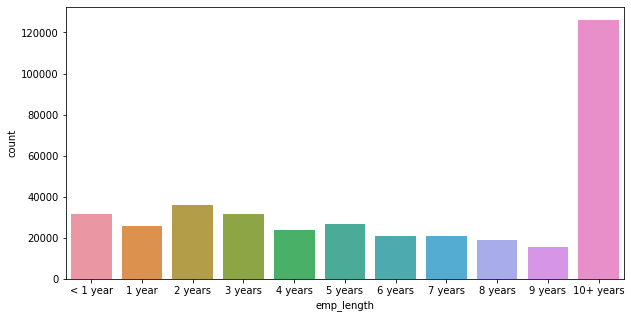

In [39]:
# Plot the distribution of each year, reorder the year.
emp_length_order = ['< 1 year', '1 year', '2 years', '3 years', '4 years', '5 years', '6 years', '7 years',
                    '8 years', '9 years', '10+ years']
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='emp_length', order=emp_length_order)

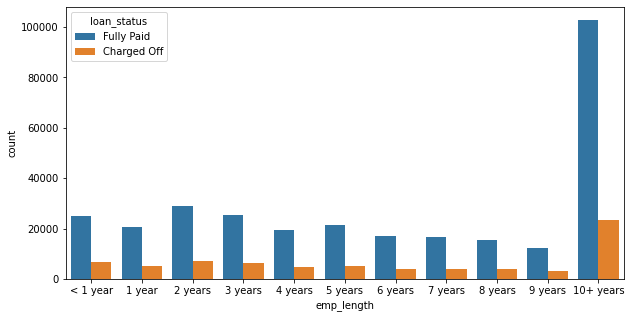

In [40]:
# Split the loan status.
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='emp_length', order=emp_length_order, hue='loan_status')

In [41]:
# Get the percentage of charge offs per category.
df.groupby(['emp_length','loan_status']).count().xs('Charged Off', level=1)['loan_amnt']/df.groupby(['emp_length','loan_status']).count().xs('Fully Paid', level=1)['loan_amnt']

emp_length
1 year       0.248649
10+ years    0.225770
2 years      0.239560
3 years      0.242593
4 years      0.238213
5 years      0.237911
6 years      0.233341
7 years      0.241887
8 years      0.249625
9 years      0.250735
< 1 year     0.260830
Name: loan_amnt, dtype: float64

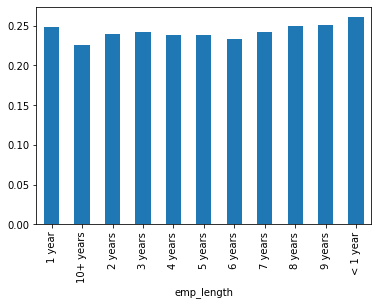

In [42]:
# Visualize the percentage.
(df.groupby(['emp_length','loan_status']).count().xs('Charged Off', level=1)['loan_amnt']/df.groupby(['emp_length','loan_status']).count().xs('Fully Paid', level=1)['loan_amnt']).plot(kind="bar")

Charge off rates are extremely similar across all employment lengths. Drop the emp_length column.

In [43]:
df.drop('emp_length', axis=1, inplace=True)

In [44]:
# Check the title and purpose column.
df['title'].head()

0                   Vacation
1         Debt consolidation
2    Credit card refinancing
3    Credit card refinancing
4      Credit Card Refinance
Name: title, dtype: object

In [45]:
df['purpose'].head()

0              vacation
1    debt_consolidation
2           credit_card
3           credit_card
4           credit_card
Name: purpose, dtype: object

Due to the title column is simply a string subcategory/description of the purpose column. So drop the title column.

In [46]:
df.drop('title', axis=1, inplace=True)

In [47]:
# Check the mort_acc unique values
df['mort_acc'].value_counts()

0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
32.0         2
31.0         2
23.0         2
26.0         2
28.0         1
30.0         1
34.0         1
Name: mort_acc, dtype: int64

In [49]:
# Get the correlation coefficient between mort_acc and other features.
df.corr()['mort_acc'].sort_values()

int_rate               -0.082583
dti                    -0.025439
revol_util              0.007514
pub_rec                 0.011552
pub_rec_bankruptcies    0.027239
loan_repaid             0.073111
open_acc                0.109205
installment             0.193694
revol_bal               0.194925
loan_amnt               0.222315
annual_inc              0.236320
total_acc               0.381072
mort_acc                1.000000
Name: mort_acc, dtype: float64

Looks like the total_acc feature correlates with the mort_acc.

In [50]:
# Group the dataframe by the total_acc and calculate the mean value for the mort_acc per total_acc entry. 
total_mort_mean = df.groupby('total_acc')['mort_acc'].mean()

In [51]:
total_mort_mean

total_acc
2.0      0.000000
3.0      0.052023
4.0      0.066743
5.0      0.103289
6.0      0.151293
           ...   
124.0    1.000000
129.0    1.000000
135.0    3.000000
150.0    2.000000
151.0    0.000000
Name: mort_acc, Length: 118, dtype: float64

In [52]:
# Define a function to fill in the missing mort_acc values based on their total_acc value.
# If the mort_acc is missing, then we will fill in that missing value with the mean value 
# corresponding to its total_acc value from the Series we created above.
def filln(list):
  for i, x in enumerate(list):
    if pd.isna(x):
      list[i] = total_mort_mean.loc[df['total_acc'].loc[i]]

In [53]:
filln(df['mort_acc'])

<ipython-input-52-a37bcbc84242>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  list[i] = total_mort_mean.loc[df['total_acc'].loc[i]]


In [54]:
# Recheck null value.
df['mort_acc'].isnull().sum()

0

In [55]:
# revol_util and the pub_rec_bankruptcies have missing data points, 
# but they account for less than 0.5% of the total data. 
# Remove the rows that are missing those values in those columns 
df.dropna(inplace=True)

In [56]:
# List all the columns that are currently non-numeric.
df.select_dtypes(include='object').columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'earliest_cr_line',
       'initial_list_status', 'application_type', 'address'],
      dtype='object')

In [57]:
# Convert the term feature into either a 36 or 60 integer numeric data type
def convert_term(term):
  if term == ' 36 months':
    return 36
  else:
    return 60
df['term'] = df['term'].apply(convert_term)

We already know grade is part of sub_grade, so just drop the grade feature.

In [58]:
df.drop('grade', axis=1, inplace=True)

In [59]:
# Convert the subgrade into dummy variables.
# Then concatenate these new columns to the original dataframe.
df_subgrade = pd.get_dummies(df['sub_grade'], drop_first=True)
df = pd.concat([df,df_subgrade], axis=1)
df.drop('sub_grade', axis=1, inplace=True)

In [60]:
# Convert the verification_status dummy variables.
# Then concatenate these new columns to the original dataframe.
df_veri = pd.get_dummies(df['verification_status'], drop_first=True)
df.drop('verification_status', axis=1, inplace=True)
df = pd.concat([df,df_veri], axis=1)

In [61]:
# Convert the application_type dummy variables.
# Then concatenate these new columns to the original dataframe.
df_appl = pd.get_dummies(df['application_type'], drop_first=True)
df.drop('application_type', axis=1, inplace=True)
df = pd.concat([df,df_appl], axis=1)

In [62]:
# Convert the initial_list_status dummy variables.
# Then concatenate these new columns to the original dataframe.
df_initial = pd.get_dummies(df['initial_list_status'], drop_first=True)
df.drop('initial_list_status', axis=1, inplace=True)
df = pd.concat([df,df_initial], axis=1)

In [63]:
# Convert the purpose dummy variables.
# Then concatenate these new columns to the original dataframe.
df_purp = pd.get_dummies(df['purpose'], drop_first=True)
df.drop('purpose', axis=1, inplace=True)
df = pd.concat([df,df_purp], axis=1)

In [ ]:
df['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          110
NONE            29
ANY              3
Name: home_ownership, dtype: int64

In [64]:
# Replace NONE and ANY with OTHER
df['home_ownership'] = df['home_ownership'].replace(['NONE','ANY'], 'OTHER')
df['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          142
Name: home_ownership, dtype: int64

In [65]:
# Convert to dummy variables.
# Then concatenate these new columns to the original dataframe.
df_owner = pd.get_dummies(df['home_ownership'], drop_first=True)
df.drop('home_ownership', axis=1, inplace=True)
df = pd.concat([df,df_owner], axis=1)

In [66]:
# Create a column called 'zip_code' that extracts the zip code from the address column.
df['zip_code'] = df['address'].apply(lambda x:x.split(' ')[-1])

In [67]:
df['zip_code'].value_counts()

70466    56880
22690    56413
30723    56402
48052    55811
00813    45725
29597    45393
05113    45300
11650    11210
93700    11126
86630    10959
Name: zip_code, dtype: int64

In [68]:
# Convert to dummy variables.
df_zip = pd.get_dummies(df['zip_code'])
df.drop(['address','zip_code'], axis=1, inplace=True)
df = pd.concat([df,df_zip], axis=1)

In [69]:
# Remove issue_d column.
df.drop('issue_d', axis=1, inplace=True)

In [70]:
# Extract the year from this feature using a .apply function, then convert it to a numeric feature. 
df['earliest_cr_year'] = df['earliest_cr_line'].apply(lambda x:int(x.split('-')[1]))
df.drop('earliest_cr_line', axis=1, inplace=True)

## Train Test Split

In [71]:
from sklearn.model_selection import train_test_split

In [72]:
df.drop('loan_status', axis=1, inplace=True)

In [73]:
X = df.drop('loan_repaid', axis=1).values
y = df['loan_repaid'].values

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

## Data Normalization

In [75]:
from sklearn.preprocessing import MinMaxScaler

In [76]:
scaler = MinMaxScaler()

In [77]:
X_train = scaler.fit_transform(X_train)

In [78]:
X_test = scaler.transform(X_test)

## Create Model

In [79]:
# Import the tensorflow lobrary.
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [80]:
# Create the model.
model = Sequential()

model.add(Dense(78,activation='relu'))
model.add(Dropout(0.5)) 
model.add(Dense(39,activation='relu'))
model.add(Dropout(0.5)) 
model.add(Dense(19,activation='relu'))
model.add(Dropout(0.5)) 
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

In [81]:
# Import the early stopping library.
from tensorflow.keras.callbacks import EarlyStopping

In [82]:
# Create the early stop instance.
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [83]:
# Fit the model.
model.fit(x=X_train, y=y_train, epochs=25, validation_data=(X_test, y_test), callbacks=[early_stop])

Epoch 1/25
8646/8646 [==============================] - 29s 3ms/step - loss: 0.2898 - val_loss: 0.2655
Epoch 2/25
8646/8646 [==============================] - 30s 3ms/step - loss: 0.2673 - val_loss: 0.2652
Epoch 3/25
8646/8646 [==============================] - 27s 3ms/step - loss: 0.2656 - val_loss: 0.2645
Epoch 4/25
8646/8646 [==============================] - 29s 3ms/step - loss: 0.2654 - val_loss: 0.2642
Epoch 5/25
8646/8646 [==============================] - 30s 3ms/step - loss: 0.2652 - val_loss: 0.2645
Epoch 6/25
8646/8646 [==============================] - 24s 3ms/step - loss: 0.2648 - val_loss: 0.2662
Epoch 7/25
8646/8646 [==============================] - 30s 3ms/step - loss: 0.2647 - val_loss: 0.2636
Epoch 8/25
8646/8646 [==============================] - 30s 3ms/step - loss: 0.2647 - val_loss: 0.2637
Epoch 9/25
8646/8646 [==============================] - 33s 4ms/step - loss: 0.2643 - val_loss: 0.2641
Epoch 10/25
8646/8646 [==============================] - 29s 3ms/step - l

## Model Evaluation

In [85]:
# Define the variable to store all the loss value.
losses = pd.DataFrame(model.history.history)

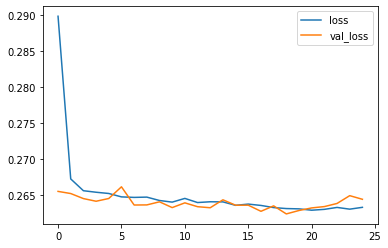

In [86]:
# Plot the loss value and compare the loss between train and validation set.
# To determine if the model is overfit.
losses.plot()

It seems the model is not overfitting.

In [87]:
# Save the model.
from tensorflow.keras.models import load_model
model.save('/content/drive/MyDrive/Colab Notebooks/project_model.h5')

In [88]:
# Load the model.
my_model = load_model('/content/drive/MyDrive/Colab Notebooks/project_model.h5')

In [89]:
# Predict the test set.
predictions = np.where(my_model.predict(X_test) > 0.5, 1,0)

3706/3706 [==============================] - 4s 980us/step


In [90]:
# Import the evaluation libraries.
from sklearn.metrics import classification_report, confusion_matrix

In [91]:
# Print the confusion metrix and the report.
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[ 9958 13405]
 [    0 95203]]
              precision    recall  f1-score   support

           0       1.00      0.43      0.60     23363
           1       0.88      1.00      0.93     95203

    accuracy                           0.89    118566
   macro avg       0.94      0.71      0.77    118566
weighted avg       0.90      0.89      0.87    118566

